# Regresión Logística

In [ ]:
from IPython.display import Image

La **regresión logística** es un tipo de análisis de regresión que se utiliza para predecir el resultado de una **variable categórica** en función de las *variables independientes* o *predictoras*.

Otros nombres para regresión logística usados en varias áreas de aplicación incluyen *modelo logístico*, *modelo logit*, y *clasificador de máxima entropía*.

El modelo general de una regresión logística esta dado por:

<div align="center">
	<font size=6>
        $P(X)=\frac{1}{1+e^{-(\alpha+\sum_{i=1}^n{(\beta_i x_i)})}}$
	<font/>
<div/>

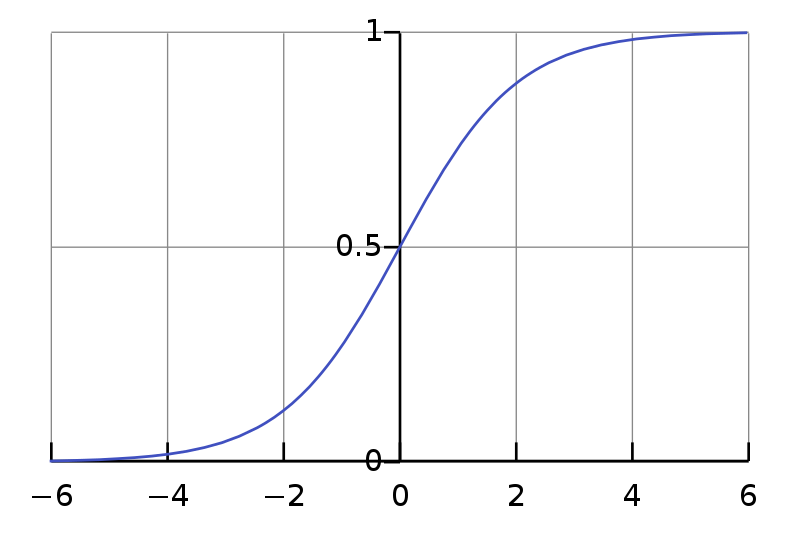

In [9]:
Image(filename="C:/Users/neosb/Downloads/python-ml-course-master/notebooks/resources/funcion_logit.png")

## Regresión Lineal VS Regresión Logística

<table>
  <thead>
    <tr>
      <th></th>
      <th>Regresión Lineal</th>
      <th>Regresión Logística</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Variables predictoras</td>
      <td>Númericas continuas o categóricas</td>
      <td>Númericas continuas o categóricas</td>
    </tr>
    <tr>
      <td>Predicciónes</td>
      <td>Numéricas continuas</td>
      <td>Categóricas</td>
    </tr>
    <tr>
      <td>Relación</td>
      <td>Lineal</td>
      <td>Lineal (aplicando alguna transformación)</td>
    </tr>
  </tbody>
</table>

## Tablas de Contingencia

In [10]:
import pandas as pd

In [11]:
# Cargar el dataset de "Gender Purchase.csv"
df = pd.read_csv("C:/Users/neosb/Downloads/python-ml-course-master/datasets/gender-purchase/Gender Purchase.csv")
df.head(20)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes
5,Female,Yes
6,Male,No
7,Female,Yes
8,Female,No
9,Female,Yes


In [12]:
# Dimensiones del dataframe
df.shape

(511, 2)

In [13]:
# Crear una tabla de contingencia mediante el método de pandas ".crosstab(col1, col2)"
contingency_table = pd.crosstab(df["Gender"], df["Purchase"])
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [14]:
# Sumatoria de los elementos de la tabla de contingencia por fila
contingency_table.sum(axis = 1)

Gender
Female    265
Male      246
dtype: int64

In [15]:
# Sumatoria de los elementos de la tabla de contingencia por columna
contingency_table.sum(axis = 0)

Purchase
No     231
Yes    280
dtype: int64

In [16]:
# Crear tabla de contingencia de proporciones
ct_proportions = contingency_table.astype("float").div(contingency_table.sum(axis=1), axis = 0)
ct_proportions

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Probabilidad condicional

La probabilidad condicional describe la probabilidad de que suceda un evento "A" dado que previamente ha acontencido algún evento "B".

**Ejemplos**:
* ¿Cuál es la probabilidad de que un cliente **compre** un producto sabiendo que **es un hombre**?
* ¿Cuál es la probabilidad de que un cliente que **ha comprado** un producto **sea mujer**?

<div align="center">
	<font size=5>
        $P(Purchase|Male) = \frac{Purchase\cap Male}{Male}$
	<font/>
<div/>

In [17]:
P_purchase_male = contingency_table["Yes"]["Male"]/(contingency_table["Yes"]["Male"]+contingency_table["No"]["Male"])
P_purchase_male

0.491869918699187

<div align="center">
	<font size=5>
        $P(No\ Purchase|Male) = \frac{No \ Purchase\cap Male}{Male} = 1-P(Purchase|Male)$
	<font/>
<div/>

In [18]:
P_NOpurchase_male = contingency_table["No"]["Male"]/(contingency_table["Yes"]["Male"]+contingency_table["No"]["Male"])
P_NOpurchase_male

0.508130081300813

<div align="center">
	<font size=5>
        $P(Female|Purchase) = \frac{Female\cap Purchase}{Purchase}$
	<font/>
<div/>

In [19]:
P_female_purchase = contingency_table["Yes"]["Female"]/(contingency_table["Yes"]["Male"]+contingency_table["Yes"]["Female"])
P_female_purchase

0.5678571428571428

<div align="center">
	<font size=5>
        $P(Male|Purchase) = \frac{Male\cap Purchase}{Purchase}$
	<font/>
<div/>

In [20]:
P_male_purchase = contingency_table["Yes"]["Male"]/(contingency_table["Yes"]["Male"]+contingency_table["Yes"]["Female"])
P_male_purchase

0.43214285714285716

## Ratio de probabilidades
El **ratio de probabilidades ($odds$)** se define como el cociente entre los casos de éxito sobre los casos de fracaso con respecto a un suceso y grupo estudiado.

In [21]:
from IPython.display import display, Math, Latex

In [22]:
display(Math(r'P_m = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ un \ hombre'))
display(Math(r'P_f = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ una\ mujer'))
display(Math(r'odds\in[0,+\infty]'))
display(Math(r'odds_{purchase,male} = \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N_{\bar p, m}}'))
display(Math(r'odds_{purchase,female} = \frac{P_F}{1-P_F} = \frac{N_{p,f}}{N_{\bar p, f}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
# Calculemos los ratios de compra para hombres y mujeres
pm = contingency_table["Yes"]["Male"]/(contingency_table["Yes"]["Male"]+contingency_table["No"]["Male"])
pf = contingency_table["Yes"]["Female"]/(contingency_table["Yes"]["Female"]+contingency_table["No"]["Female"])
odds_m = pm/(1-pm)
odds_f = pf/(1-pf)
print("odds_m = ",odds_m)
print("odds_f = ",odds_f)

odds_m =  0.9680000000000002
odds_f =  1.4999999999999998


**Interpretación del ratio de probabilidad**
* Si el ratio es superior a 1, es más probable el éxito que el fracaso. Cuanto mayor es el ratio, más probabilidad de éxito en nuestro suceso.
* Si el ratio es exactamente igual a 1, éxito y fracaso son equiprobables (p=0.5)
* Si el ratio es menor que 1, el fracaso es más probable que el éxito. Cuanto menor es el ratio, menor es la probabilidad de éxito del suceso.

In [24]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase,male}}{odds_{purchase,female}}'))

<IPython.core.display.Math object>

In [25]:
odds_r = odds_m/odds_f
print("odds_r = ",odds_r)

odds_r =  0.6453333333333335


In [26]:
odds_r = odds_f/odds_m
print("odds_r = ",odds_r)

odds_r =  1.5495867768595035


## De la regresión lineal a la regresión logística

El modelo de una regresión lineal esta dado por:

<div align="center">
	<font size=5>
        $y = \alpha + \beta \cdot x$
	<font/>
<div/>
<div align="center">
	<font size=5>
        $(x,y)\in[-\infty, +\infty]^2$
	<font/>
<div/>

Para el caso de una regresión lógistica, se busca que la variable de salida $Y$ sea categórica y que pueda entregar uno de dos posibles valores; es decir:

<div align="center">
	<font size=5>
        $Y\in\{0,1\}$
	<font/>
<div/>

Si bien en principio es complicado condicionar que la salida del modelo de la regresión lineal sea uno de dos posibles valores, es posible condicionar a dicho modelo a tener un rango específico para la variable de salida.

Si igualamos por ejemplo la probabilidad $P$ (probabilidad condicionada de éxito o fracaso) con la ecuación característica de la regresión lineal, se tiene que:

<div align="center">
	<font size=5>
        $P = \alpha + \beta\cdot X$
	<font/>
<div/>
<div align="center">
	<font size=5>
        $P\in [0,1], \ X\in [-\infty,\infty]$
	<font/>
<div/>

Donde la probabilidad condicionada de éxito o de fracaso $P$ es función de la variable $X$

Ahora, si en lugar de igualar el modelo de la regresión lineal con la probabilidad condicionada $P$ lo hacemos con respecto al *ratio de probabilidades* de exito/fracaso, se tendría que:

<div align="center">
	<font size=5>
        $\frac{P}{1-P} = \alpha + \beta\cdot X\in [0,+\infty]$
	<font/>
<div/>

Si ahora, en lugar del ratio de probabilidades, tomamos el *logaritmo neperiano (natural)* de dicho valor, se tendría que:

<div align="center">
	<font size=5>
        $ln(\frac{P}{1-P}) = \alpha + \beta\cdot X$
	<font/>
<div/>

donde:

<div align="center">
	<font size=5>
        $\begin{cases}\frac{P}{1-P}\in[0,1]\Rightarrow ln(\frac{P}{1-P})\in[-\infty,0]\\ \frac{P}{1-P}\in[1,+\infty]\Rightarrow ln(\frac{P}{1-P})\in[0, \infty]\end{cases}$
	<font/>
<div/>

Si operamos la expresión para dejar al lado derecho el término que representa a la probabilidad condicionada de exito/fracaso $P$, se tiene que:

<div align="center">
	<font size=5>
        $ln(\frac{P}{1-P}) = \alpha + \beta\cdot X$
	<font/>
<div/>

<div align="center">
	<font size=5>
        $\frac{P}{1-P} = e^{\alpha + \beta\cdot X}$
	<font/>
<div/>

<div align="center">
	<font size=5>
        $P = \frac{e^{\alpha+\beta\cdot X}}{1+e^{\alpha+\beta\cdot X}}$
	<font/>
<div/>

<div align="center">
	<font size=5>
        $P = \frac{1}{1+e^{-(\alpha+\beta\cdot X)}}$
	<font/>
<div/>

Donde:
* Si $\alpha+\beta X$ es muy pequeño (negativo), entonces $P$ tiende a 0
* Si $\alpha+\beta X$ = 0, entonces $P = 0.5$
* Si $\alpha+\beta X$ es muy grande (positivo), entonces $P$ tiende a 1

## Regresión logística múltiple

La extensión del modelo de regresión logística simple a una regresión lógistica múltiple es bastante intuitiva:

<div align="center">
	<font size=5>
        $P = \frac{1}{1+e^{-(\alpha+\sum_{i=1}^n\beta_i\cdot x_i)}}$
	<font/>
<div/>

En muchas ocasiones, también es común representar el modelo de regresión logística en términos de *notación de vectores*

<div align="center">
	<font size=5>
        $P = \frac{1}{1+e^{-(\alpha+\vec{\beta}\cdot \vec{X})}}$
	<font/>
<div/>
<div align="center">
	<font size=5>
        $\vec{\beta} = (\beta_1,\beta_2,\cdots,\beta_n), \ \vec{X} = (x_1,x_2,\cdots,x_n)$
	<font/>
<div/>